In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
import os

In [2]:
path = 'D:/Image Classification Self/Data/Traffic Sign Dataset/data/'

In [3]:
train_data = pd.read_csv(path + 'Train.csv')
test_data = pd.read_csv(path + 'Test.csv')

In [4]:
print(train_data.shape)
train_data.head()

(39209, 8)


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [5]:
print(test_data.shape)
test_data.head()

(12630, 8)


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [6]:
images = []
labels = []

def load_data(dataset):
    for i in range(len(dataset)):
        image = cv.imread(path + dataset['Path'][i])
        image_req = image[dataset['Roi.Y1'][i]:dataset['Roi.Y2'][i], dataset['Roi.X1'][i]:dataset['Roi.X2'][i]]
        if image_req is None:
            continue
        image_req = cv.resize(image_req, (110, 110))
        image_req = cv.cvtColor(image_req, cv.COLOR_BGR2RGB)
        image_req = image_req.astype('float32')/255.0
        label = int(dataset['ClassId'][i])
        images.append(image_req)
        labels.append(label)
    return images, labels

In [7]:
images, labels = load_data(train_data)
images, labels = load_data(test_data)

len(images), len(labels)

(51839, 51839)

In [8]:
images_r = np.array(images)
labels_r = np.array(labels)

In [9]:
del images
del labels

20


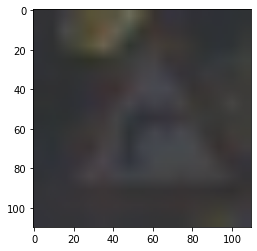

In [10]:
import matplotlib.pyplot as plt

print(labels_r[0])
plt.imshow(images_r[0])

1


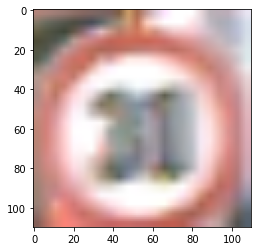

In [11]:
print(labels_r[1000])
plt.imshow(images_r[1000])

2


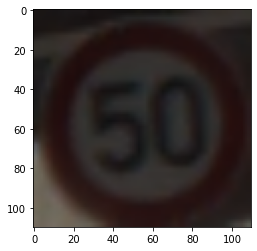

In [12]:
print(labels_r[5000])
plt.imshow(images_r[5000])

4


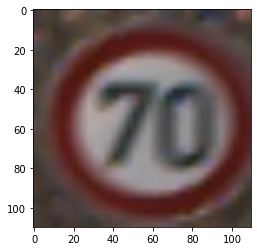

In [13]:
print(labels_r[7000])
plt.imshow(images_r[7000])

In [14]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(images_r, labels_r, test_size=0.1, random_state=123)

In [16]:
Y_train_req = to_categorical(Y_train)
Y_test_req = to_categorical(Y_test)

print(X_train.shape, X_test.shape, Y_train_req.shape, Y_test_req.shape)

(46655, 110, 110, 3) (5184, 110, 110, 3) (46655, 43) (5184, 43)


In [17]:
del images_r
del labels_r

In [18]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout, Input
from tensorflow.keras.models import Sequential

In [19]:
model = Sequential()
model.add(Input((110, 110, 3)))

model.add(Conv2D(32, (3,3), padding='same', strides=1, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(32, (3,3), padding='same', strides=1, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(64, (3,3), padding='same', strides=1, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(64, (3,3), padding='same', strides=1, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(128, (3,3), padding='same', strides=1, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(128, (3,3), padding='same', strides=1, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(128, (3,3), padding='same', strides=1, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(256, (3,3), padding='same', strides=1, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(256, (3,3), padding='same', strides=1, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(256, (3,3), padding='same', strides=1, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(256, (3,3), padding='same', strides=1, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(256, (3,3), padding='same', strides=1, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(256, (3,3), padding='same', strides=1, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Flatten())
model.add(Dense(1024, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(256, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(120, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(43, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 110, 110, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 110, 110, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 55, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 55, 55, 64)        2

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history = model.fit(X_train, Y_train_req, epochs=20, batch_size=64, validation_split=0.1)

Train on 41989 samples, validate on 4666 samples
Epoch 1/20
41989/41989 [==============================] - 232s 6ms/sample - loss: 0.5090 - accuracy: 0.8598 - val_loss: 0.1015 - val_accuracy: 0.9700
Epoch 2/20
41989/41989 [==============================] - 249s 6ms/sample - loss: 0.0583 - accuracy: 0.9843 - val_loss: 0.0906 - val_accuracy: 0.9773
Epoch 3/20
41989/41989 [==============================] - 269s 6ms/sample - loss: 0.0396 - accuracy: 0.9893 - val_loss: 0.0640 - val_accuracy: 0.9805
Epoch 4/20
41989/41989 [==============================] - 284s 7ms/sample - loss: 0.0421 - accuracy: 0.9887 - val_loss: 0.0885 - val_accuracy: 0.9762
Epoch 5/20
41989/41989 [==============================] - 288s 7ms/sample - loss: 0.0316 - accuracy: 0.9925 - val_loss: 0.1444 - val_accuracy: 0.9659
Epoch 6/20
41989/41989 [==============================] - 288s 7ms/sample - loss: 0.0360 - accuracy: 0.9915 - val_loss: 0.3392 - val_accuracy: 0.9366
Epoch 7/20
41989/41989 [===========================

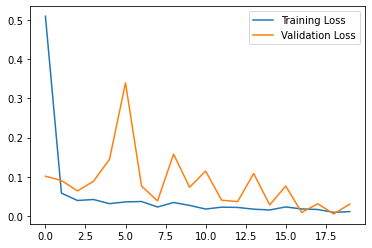

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'], loc='best')
plt.show()

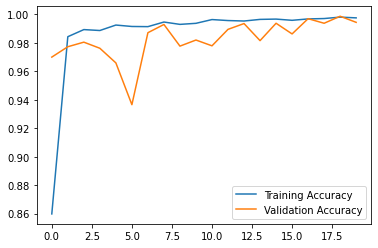

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='best')
plt.show()

In [25]:
model.evaluate(X_test, Y_test_req)

5184/5184 [==============================] - 11s 2ms/sample - loss: 0.0359 - accuracy: 0.9909


[0.03588890829903755, 0.99093366]

In [26]:
meta_data = pd.read_csv(path + 'Meta.csv')
meta_data.head()

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


In [29]:
test_images = []
test_labels = []

def load_data_test(dataset):
    for i in range(len(dataset)):
        image = cv.imread(path + dataset['Path'][i])
        if image is None:
            continue
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        image = cv.resize(image, (110, 110))
        image = image.astype('float32')/255.0
        label = int(dataset['ClassId'][i])
        test_images.append(image)
        test_labels.append(label)
    test_images_r = np.array(test_images)
    test_labels_r = np.array(test_labels)
    return test_images_r, test_labels_r

In [30]:
test_images, test_labels = load_data_test(meta_data)

In [31]:
test_images.shape, test_labels.shape

((43, 110, 110, 3), (43,))

In [46]:
predictions = model.predict_classes(test_images)

In [47]:
predictions

array([23,  1,  1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  1, 20, 21, 23,
       23, 24, 29, 26, 28, 29,  5, 11, 21, 32, 33, 34,  1, 36, 37, 38, 39,
        4,  7, 41, 42,  5,  6,  5,  8,  9], dtype=int64)

In [48]:
test_labels

array([27,  0,  1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22,
       23, 24, 25, 26, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
        4, 40, 41, 42,  5,  6,  7,  8,  9])

In [49]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, predictions)

0.7441860465116279

In [ ]:
rows = 6
columns = 7
index_number = 0
fig = plt.figure(figsize=(13, 13))

for i in range(1, (rows*columns)-1):
    fig.add_subplot(rows, columns, i)
    image = images_test[index_number]
    plt.imshow(image)
    plt.title('{} \n {}'.format(images_labels[index_number], pred_req[index_number]))
    index_number += 1
plt.show()